## Import Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
df_1 = pd.read_csv('calories.csv')
df_2 = pd.read_csv('exercise.csv')

In [7]:
df_1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
df_2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Merging both the datasets

In [10]:
df = pd.merge(df_2,df_1,how='outer')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,female,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,female,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,female,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,male,23,169.0,73.0,25.0,102.0,40.7,122.0


In [11]:
df.shape

(15000, 9)

In [14]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [15]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## EDA

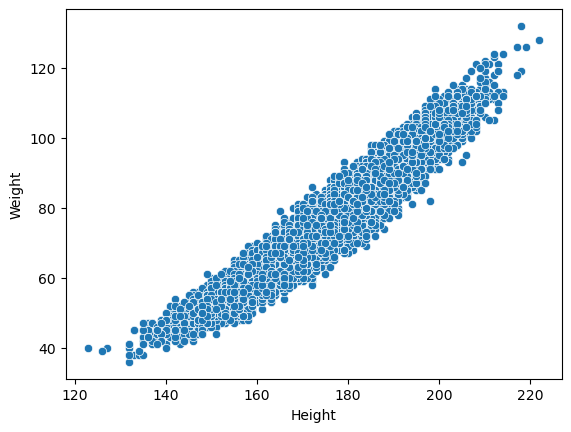

In [16]:
sns.scatterplot(x='Height', y='Weight', data=df)
plt.show()

So, we have a kind of linear relationship between these two features which is quite obvious.

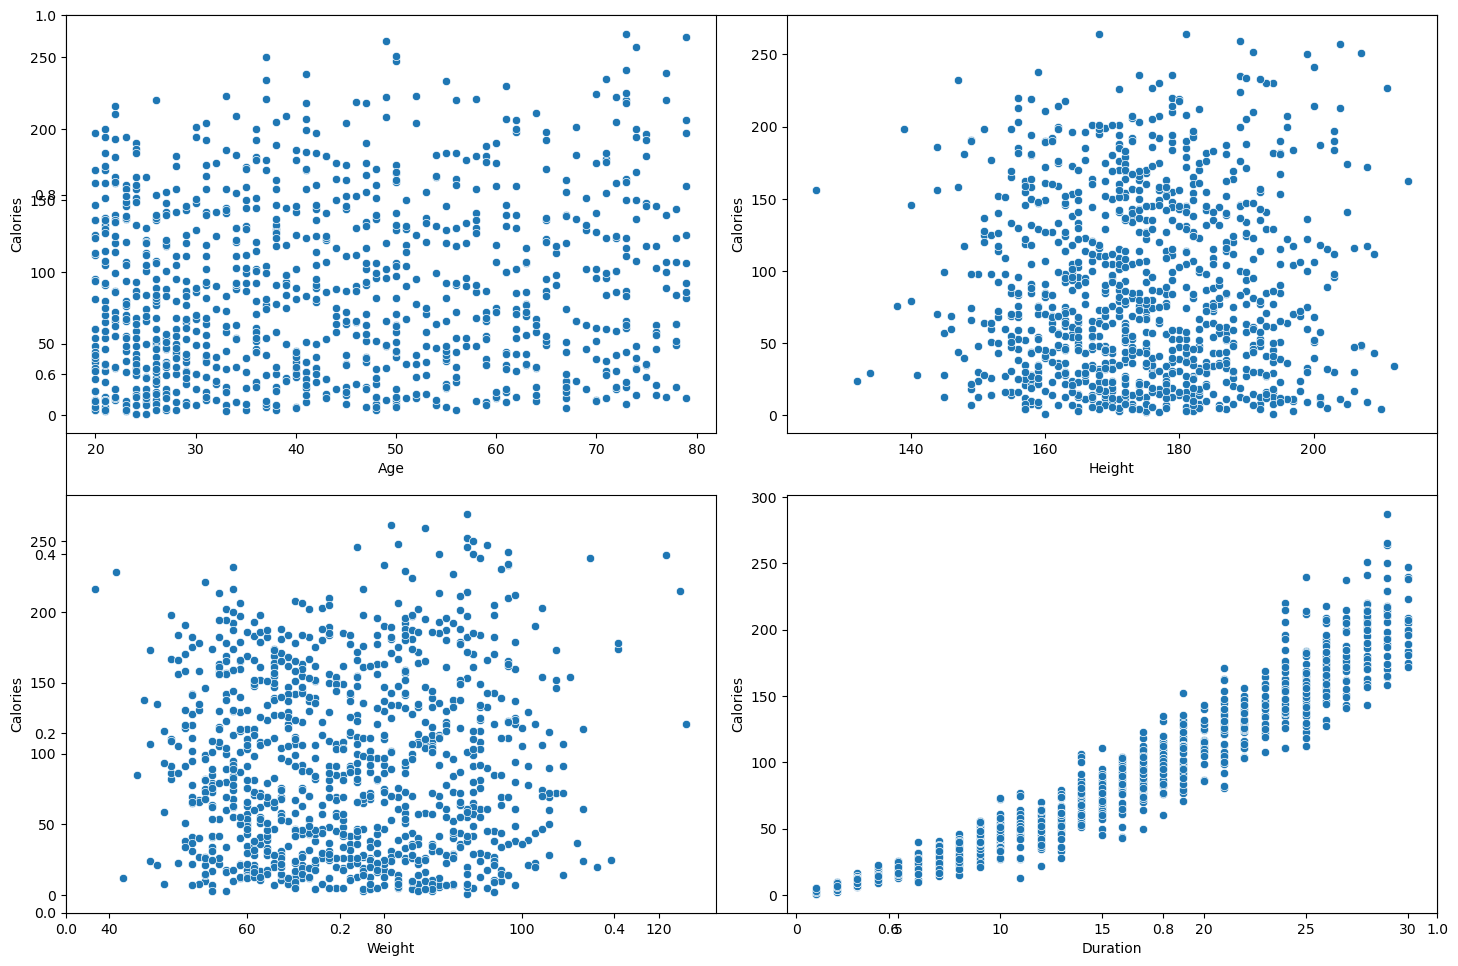

In [18]:
features = ['Age','Height','Weight','Duration']

plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    x = df.sample(1000)    # different sample for each feature, if we want same sample we can define x before the loop
    sns.scatterplot(x=col, y='Calories', data=x)

plt.tight_layout()
plt.show()

As expected higher is the duration of the workout higher will be the calories burnt. But except for that, we cannot observe any such relation between calories burnt and height or weight features.

In [24]:
features = df.select_dtypes(include='float').columns
features

Index(['Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'], dtype='object')

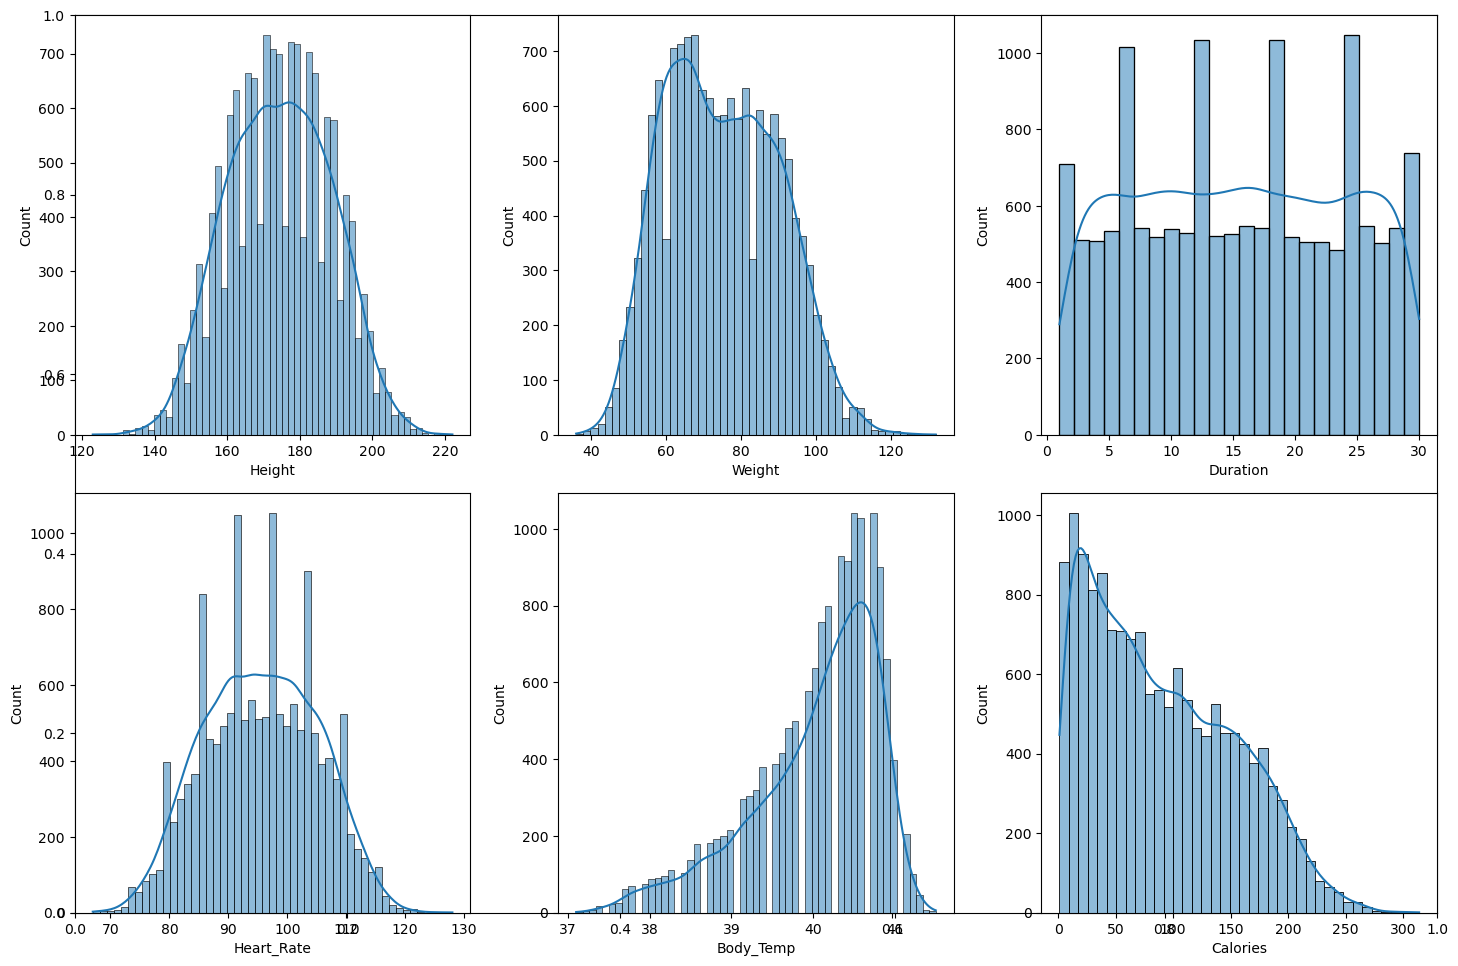

In [26]:
plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.histplot(x=col, data=df, kde=True)
plt.tight_layout()
plt.show()

The distribution of the continuous features follows close to normal distribution except for some features like Body_Temp and Calories.

In [27]:
df['Gender'] = df['Gender'].map({'male':0, 'female':1})
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,10001159,1,67,176.0,74.0,12.0,103.0,39.6,76.0
1,10001607,1,34,178.0,79.0,19.0,96.0,40.6,93.0
2,10005485,1,38,178.0,77.0,14.0,82.0,40.5,49.0
3,10005630,1,39,169.0,66.0,8.0,90.0,39.6,36.0
4,10006441,0,23,169.0,73.0,25.0,102.0,40.7,122.0


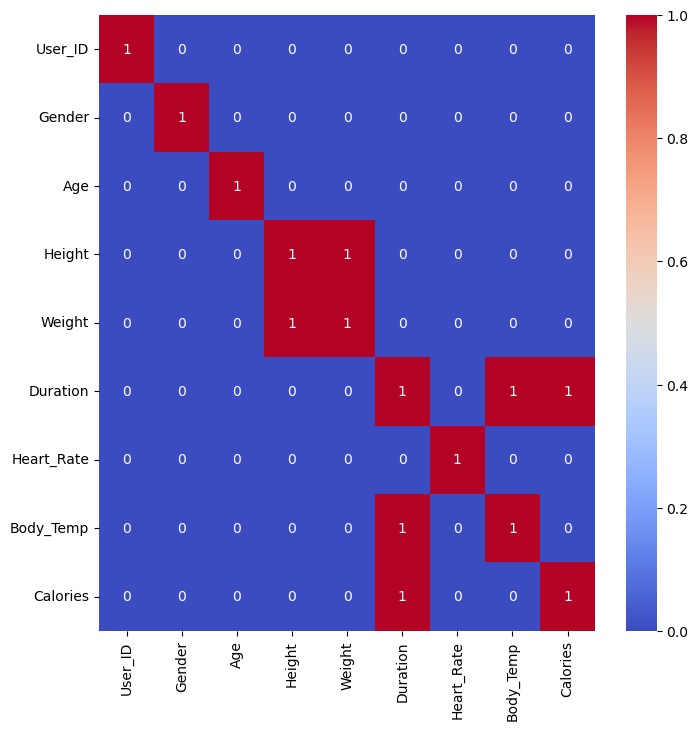

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=True, cmap='coolwarm')
plt.show()

Here we have a serious problem of data leakage as there is a feature that is highly correlated with the target column which is calories.


In [34]:
to_remove = ['Weight','Duration']
df.drop(to_remove, axis=1, inplace=True)
df.head()

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,10001159,1,67,176.0,103.0,39.6,76.0
1,10001607,1,34,178.0,96.0,40.6,93.0
2,10005485,1,38,178.0,82.0,40.5,49.0
3,10005630,1,39,169.0,90.0,39.6,36.0
4,10006441,0,23,169.0,102.0,40.7,122.0


## Model Training

In [35]:
# separating feature and target variables
features = df.drop(['User_ID','Calories'], axis=1)
target = df['Calories'].values

# splitting into training and test data
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.1, random_state=22)
x_train.shape, x_test.shape

((13500, 5), (1500, 5))

In [36]:
y_train.shape, y_test.shape

((13500,), (1500,))

#### Normalizing the data

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
# training the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range (5):
    models[i].fit(x_train,y_train)

    print(f'{models[i]}: ')

     # Training predictions
    training_pred = models[i].predict(x_train)
    print('Training Metrics:')
    print('   MAE :', mean_absolute_error(y_train, training_pred))
    print('   MSE :', mean_squared_error(y_train, training_pred))
    print('   R²  :', r2_score(y_train, training_pred))
    
    # Validation predictions
    validation_pred = models[i].predict(x_test)
    print('Validation Metrics:')
    print('   MAE :', mean_absolute_error(y_test, validation_pred))
    print('   MSE :', mean_squared_error(y_test, validation_pred))
    print('   R²  :', r2_score(y_test, validation_pred))
    print('-'*50)

LinearRegression(): 
Training Metrics:
   MAE : 17.9232671415536
   MSE : 508.0107205103553
   R²  : 0.8699296575175559
Validation Metrics:
   MAE : 17.98709313328684
   MSE : 502.49568072206773
   R²  : 0.8695155016802032
--------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_p

Out of all the above models, we have trained RandomForestRegressor and the XGB model's performance is the same as their MAE for the validation data is same.